# Comentarios para llevarse de la clase

- Los modelos son modelos y la realidad la realidad. Que coincidan o no es otro problema. Todos los detalles matematicos tecnicos son para validar la consistencia matematica del modelo, no de los datos.
- Una cosa es evaluar si el modelo es razonable y otra si los datos ajustan y son buenos predictores. Ejemplo Long-Lat en properati.
- En la presentacion hay codigos implementados a mano que despues vamos a usar ya implementados.

In [16]:
# Vamos a generar un dataset de juguete

import numpy as np
import pandas as pd
import seaborn as sns

In [71]:
N = 1000
x = 2 * np.random.random(N) - 1
b_0 = 340
b_1 = 73
factor_ruido = 1
factor_cuadratico = 1

y = b_0 + b_1*x + factor_ruido*(np.random.random(N)*2-1) + factor_cuadratico*b_1*x*x
data = pd.DataFrame({'Y':y,'X':x})


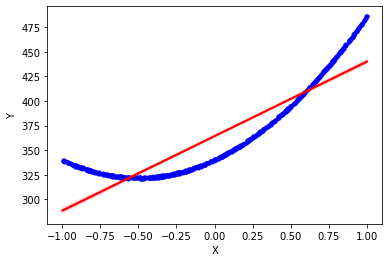

In [72]:
sns.regplot(data = data, x = "X", y = "Y", 
            ci = 95,
            scatter_kws = {"color": "blue", 's': 10},
            line_kws = {"color": "red"});   

In [61]:
beta_0 = b_0
beta_1 = b_1

mean_y = data['Y'].mean()


tss_i = data['X'].apply(lambda yi: (yi - mean_y) ** 2)
tss = tss_i.sum()

y_hat_i = beta_0 + beta_1 * data['X']


i_count = data.shape[0]
rss_i = [(data['Y'][i] - y_hat_i[i]) ** 2 for i in range(i_count)]
    
rss = sum(rss_i)


r2 = (tss - rss) / tss
print("R2: ", np.round(r2, 3))


R2:  1.0


In [62]:
from sklearn.linear_model import LinearRegression

[42.10130211]
301.0914123689629


<AxesSubplot:xlabel='X', ylabel='Y'>

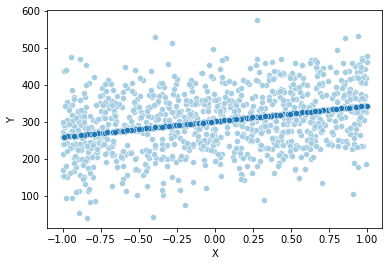

In [78]:
N = 1000
x = 2 * np.random.random(N) - 1
b_0 = 340
b_1 = 40
factor_ruido = 1
factor_cuadratico = 0

y = b_0 + b_1*x + b_1*factor_ruido*(np.random.standard_normal(N)*2-1) + factor_cuadratico*b_1*x*x
data = pd.DataFrame({'Y':y,'X':x})

model = LinearRegression()
X = data.drop(columns='Y')
y = data['Y']
model.fit(X,y)
print (model.coef_)
print (model.intercept_)


g = sns.scatterplot(x = data['X'], y=data['Y'])
y_hat = model.intercept_ + model.coef_[0] * data['X']
sns.scatterplot(x=data['X'], y = y_hat)


En la iteracion numero 0, la ordenada al origen dio: 335.4809125705623 y la pendiente dio 78.6499326134549
En la iteracion numero 1, la ordenada al origen dio: 345.9860786334929 y la pendiente dio 74.28395176740447
En la iteracion numero 2, la ordenada al origen dio: 341.98672451612566 y la pendiente dio 77.51486236999989


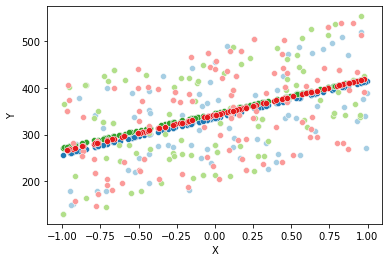

In [67]:
N = 1000
x = 2 * np.random.random(N) - 1
b_0 = 340
b_1 = 73
factor_ruido = 2
factor_cuadratico = 0

y = b_0 + b_1*x + b_1*factor_ruido*(np.random.random(N)*2-1) + factor_cuadratico*b_1*x*x
data = pd.DataFrame({'Y':y,'X':x})

m = 3
samples = 100
model = LinearRegression()
sns.set_palette(sns.color_palette("Paired"))

for i in range(m):
    data_red = data.sample(samples)
    X = data_red.drop(columns='Y')
    y = data_red['Y']
    model.fit(X,y)
    b_1_hat = model.coef_[0]
    b_0_hat = model.intercept_
    sns.scatterplot(x = data_red['X'], y=data_red['Y'])
    y_hat = b_0_hat + b_1_hat * data_red['X']
    sns.scatterplot(x=data_red['X'], y = y_hat)
    print (f'En la iteracion numero {i}, la ordenada al origen dio: {b_0_hat} y la pendiente dio {b_1_hat}')


<AxesSubplot:xlabel='X', ylabel='Y'>

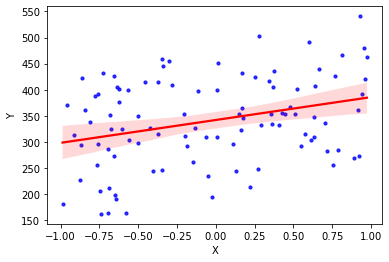

In [142]:
sns.regplot(data = data.sample(samples), x = "X", y = "Y", 
            ci = 95,
            scatter_kws = {"color": "blue", 's': 10},
            line_kws = {"color": "red"})   

In [79]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import seaborn as sns

In [82]:
advertising_file_path = "advertising.csv"
advertising = pd.read_csv(advertising_file_path)
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [84]:
import statsmodels.api as sm

X_t = np.array(advertising.Radio, ndmin=2)
X = np.transpose(X_t)
y = advertising.Sales

# Tenemos que agregar explícitamente a una constante:
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print (model.summary())

model = LinearRegression()

X = advertising['Radio']
y = advertising['Sales']
model.fit(X,y)
b_1_hat = model.coef_[0]
b_0_hat = model.intercept_

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.122
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     27.57
Date:                Thu, 10 Nov 2022   Prob (F-statistic):           3.88e-07
Time:                        23:26:32   Log-Likelihood:                -603.18
No. Observations:                 200   AIC:                             1210.
Df Residuals:                     198   BIC:                             1217.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.2357      0.653     18.724      0.0

ValueError: Expected 2D array, got 1D array instead:
array=[37.8 39.3 45.9 41.3 10.8 48.9 32.8 19.6  2.1  2.6  5.8 24.  35.1  7.6
 32.9 47.7 36.6 39.6 20.5 23.9 27.7  5.1 15.9 16.9 12.6  3.5 29.3 16.7
 27.1 16.  28.3 17.4  1.5 20.   1.4  4.1 43.8 49.4 26.7 37.7 22.3 33.4
 27.7  8.4 25.7 22.5  9.9 41.5 15.8 11.7  3.1  9.6 41.7 46.2 28.8 49.4
 28.1 19.2 49.6 29.5  2.  42.7 15.5 29.6 42.8  9.3 24.6 14.5 27.5 43.9
 30.6 14.3 33.   5.7 24.6 43.7  1.6 28.5 29.9  7.7 26.7  4.1 20.3 44.5
 43.  18.4 27.5 40.6 25.5 47.8  4.9  1.5 33.5 36.5 14.  31.6  3.5 21.
 42.3 41.7  4.3 36.3 10.1 17.2 34.3 46.4 11.   0.3  0.4 26.9  8.2 38.
 15.4 20.6 46.8 35.  14.3  0.8 36.9 16.  26.8 21.7  2.4 34.6 32.3 11.8
 38.9  0.  49.  12.  39.6  2.9 27.2 33.5 38.6 47.  39.  28.9 25.9 43.9
 17.  35.4 33.2  5.7 14.8  1.9  7.3 49.  40.3 25.8 13.9  8.4 23.3 39.7
 21.1 11.6 43.5  1.3 36.9 18.4 18.1 35.8 18.1 36.8 14.7  3.4 37.6  5.2
 23.6 10.6 11.6 20.9 20.1  7.1  3.4 48.9 30.2  7.8  2.3 10.   2.6  5.4
  5.7 43.  21.3 45.1  2.1 28.7 13.9 12.1 41.1 10.8  4.1 42.  35.6  3.7
  4.9  9.3 42.   8.6].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.